In [1]:
from PIL import Image
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
BASE_PATH = '../../out/iDISF_LODESTAR/latest_predictions'

In [4]:
segmentations = []
gt = []
segmentation_files = ['1.png','2.png','3.png','5.png','6.png']
gt_files = ['1_.jpg','2_.jpg','3_.jpg','5_.jpg','6_.jpg']
# Opening the segmentation images
for file in segmentation_files:
    segmentations.append(cv2.cvtColor(np.array(Image.open(f'{BASE_PATH}/segmentation/{file}')),cv2.COLOR_GRAY2RGB))
# Opening the ground truth images

for file in gt_files:
    gt.append(Image.open(f'{BASE_PATH}/cropped_gt/{file}'))

In [5]:
def visualize(figsize=(15, 15),**images):
    """Plots images in one row."""
    n = len(images)
    plt.figure(figsize=figsize)
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [6]:
def overlay_comparison(pred, gt):
    """ Creates an overlapped visualization 
    bewtween the ground truth and the obtained prediction"""
    pred_arr = np.asarray(pred)
    gt_arr = np.asarray(gt)

    binary_xor = cv2.bitwise_xor(pred_arr, gt_arr)
    return Image.fromarray(binary_xor)

In [7]:
def change_color(img):
    ''' Transforms all the white color in green'''
    green = np.array([0, 255, 0])
    # Definir as cores que você quer substituir (branco)
    low = np.array([200, 200, 200])
    high = np.array([255, 255, 255])
    mask = cv2.inRange(np.array(img), low, high)
    painted_img = np.array(img).copy()
    # Substituir as cores brancas pela cor verde
    painted_img[mask != 0] = green
    return painted_img

In [8]:
print(np.array(segmentations[0]).shape)
print(np.array(gt[0]).shape)

(1132, 1648, 3)
(1132, 1648, 3)


In [9]:
def calculate_dice(image1, image2):
    """ Computes the Dice Coheficient metric"""
    np_1 = np.asarray(image1)
    np_2 = np.asarray(image2)
    intersection = np.sum(np_1 & np_2)
    sum = abs(np.sum(image1)) + abs(np.sum(image2))
    dice = (2. * intersection) / sum 
    return dice

In [10]:
def calculate_iou(image1, image2):
    """ Computes the Intersection Over Union metric"""
    intersection = np.logical_and(image1, image2)
    union = np.logical_or(image1, image2)
    iou = np.sum(intersection) / np.sum(union)
    return iou

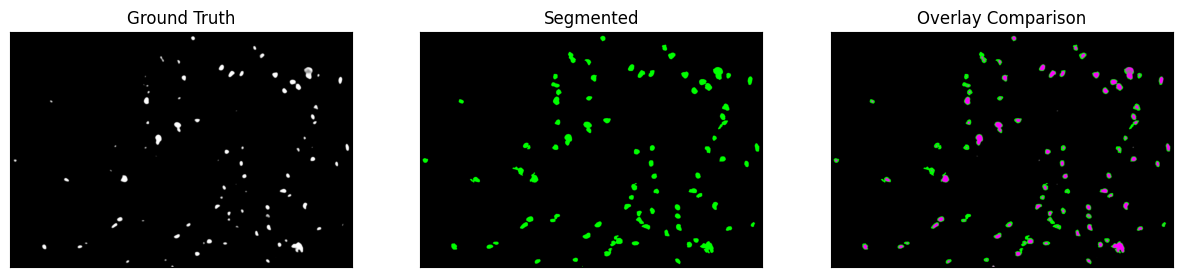

IOU: 0.6620108216937209
DICE: 0.5792624185836823


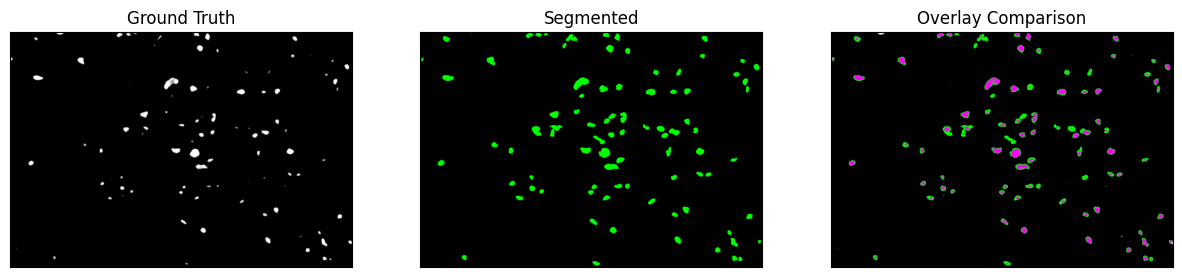

IOU: 0.639641080829528
DICE: 0.5768134831301972


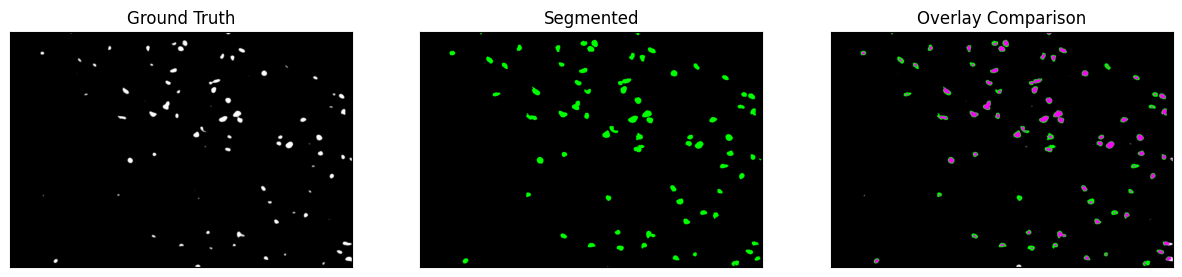

IOU: 0.66779643696563
DICE: 0.6281886459706595


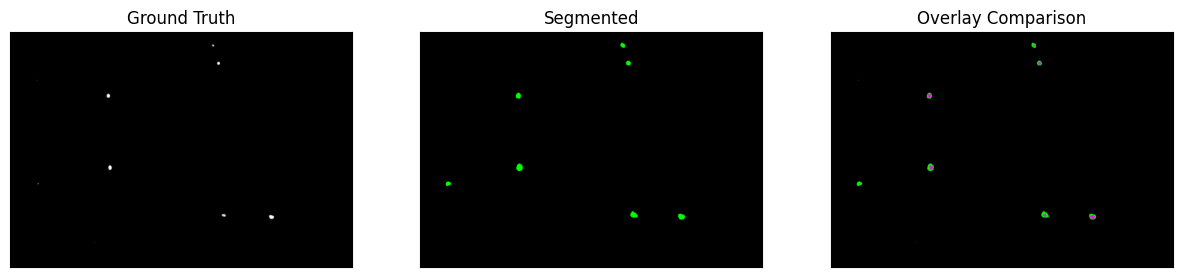

IOU: 0.572542581571927
DICE: 0.4583148700923993


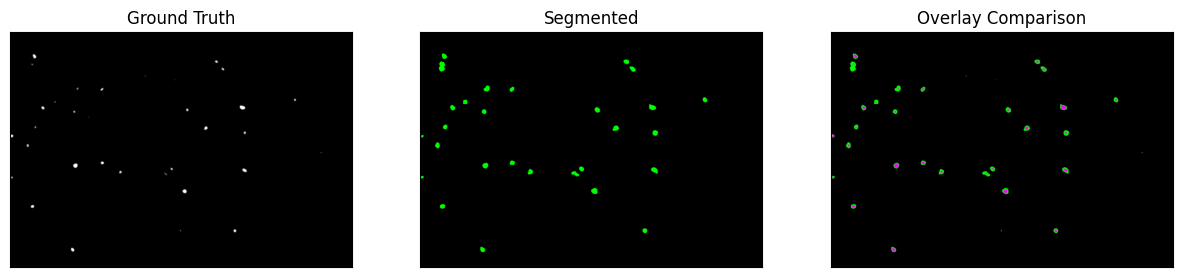

IOU: 0.5415801032824835
DICE: 0.40660927851096096


In [12]:
for index in range(len(gt)):
    ovl_img = overlay_comparison(change_color(segmentations[index]), gt[index])
    visualize(ground_truth=gt[index], Segmented=change_color(segmentations[index]), overlay_comparison=ovl_img)
    print(f'IOU: {calculate_iou(gt[index],segmentations[index])}')
    print(f'DICE: {calculate_dice(gt[index],segmentations[index])}')